In [ ]:
!pip install pyspark
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=47a3a3640acbe6f0036b502b0faeebc6666c1b3028c16217ba93e9793b5b5203
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append(" ")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from pyspark.sql import SparkSession
from functools import reduce
# init SparkSession
spark = SparkSession.builder.appName("BDM Final").getOrCreate()

# read the csv file
base_path = "/content/drive/MyDrive/巨量資料/BDM_Final/archive-2/"

file_list = [
    "Covid-19 Twitter Dataset (Apr-Jun 2020).csv",
    "Covid-19 Twitter Dataset (Apr-Jun 2021).csv",
    "Covid-19 Twitter Dataset (Aug-Sep 2020).csv"
]

data_frames = []


for file_name in file_list:
    file_path = base_path + file_name
    df = spark.read.csv(file_path, header=True, inferSchema=True)
    data_frames.append(df)

combined_df = reduce(lambda df1, df2: df1.union(df2), data_frames)

In [ ]:
# 2 sec
combined_df.head(20)

[Row(id='1.25e+18', created_at='2020-04-19', source='"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>"', original_text='RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…', lang='en', favorite_count='0.0', retweet_count='31.0', original_author='RJIshak', hashtags=None, user_mentions='GlblCtzn, priyankachopra', place='Jakarta Capital Region', clean_tweet='call leader help protect refuge covid19 provid qualiti health care', compound='0.8176', neg='0.0', neu='0.452', pos='0.548', sentiment='pos'),
 Row(id='1.25e+18', created_at='2020-04-19', source='"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>"', original_text='RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq', lang='en', favorite_count='0.0', retweet_count='61.0', original_author='makinwaoluwole', h

In [ ]:
# 47 sec
pandas_df = combined_df.toPandas()
pandas_df.head(20)

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.25e+18,2020-04-19,"""<a href=""""http://twitter.com/download/android...",RT @GlblCtzn: .@priyankachopra is calling on l...,en,0.0,31.0,RJIshak,None,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.452,0.548,pos
1,1.25e+18,2020-04-19,"""<a href=""""http://twitter.com/download/android...",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,en,0.0,61.0,makinwaoluwole,None,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.602,0.398,pos
2,1.25e+18,2020-04-19,"""<a href=""""http://twitter.com/download/iphone""...",RT @AdvoBarryRoux: These 5 police officials ba...,en,0.0,1.0,TembeAmu,None,AdvoBarryRoux,None,polic offici base namahadi polic station busi ...,0.2732,0.0,0.851,0.149,pos
3,1.25e+18,2020-04-19,"""<a href=""""http://twitter.com/download/iphone""...",RT @MobilePunch: COVID-19: Oyo discharges two ...,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"https://t.co/eQRE00ZiJo""",en,0.0,0.0,ilyasrabiu,None,MobilePunch,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0,0.0,1.0,0.0,neu,None,None,None
5,1.25e+18,2020-04-19,"""<a href=""""http://twitter.com/download/android...",My Condolences to the Family of those who did ...,en,0.0,13869.0,bucketeconomist,Covid_19,None,None,condol famili surviv,0.0,0.0,1.0,0.0,neu
6,1.25e+18,2020-04-19,"""<a href=""""http://twitter.com/download/iphone""...",RT @DrJMZimmerman: I received this text from m...,en,0.0,526.0,rohaniroop,None,DrJMZimmerman,"British Columbia, Canada",receiv text year old son work covid19 patient ...,0.0,0.0,1.0,0.0,neu
7,1.25e+18,2020-04-19,"""<a href=""""http://twitter.com/download/iphone""...",Taiwan's Vice-President Chen Chien-jen on his ...,en,0.0,119.0,agostinhozinga,None,None,"London, England",taiwan vice presid chen chien jen countri figh...,-0.3818,0.245,0.755,0.0,neg
8,1.25e+18,2020-04-19,"""<a href=""""http://twitter.com/download/iphone""...",RT @morethanmySLE: BREAKING: A New York woman ...,en,0.0,474.0,DrJeffreyPOlson,coronavirus,morethanmySLE,JPO Aesthetics,break new york woman symptom die last week pre...,-0.5994,0.262,0.738,0.0,neg
9,1.25e+18,2020-04-19,"""<a href=""""https://mobile.twitter.com"""" rel=""""...",Horrible tragedy in Nova Scotia today. How wil...,en,0.0,23.0,MichelleCarbert,None,None,"Ottawa, Ontario",horribl tragedi nova scotia today famili get c...,0.0,0.0,1.0,0.0,neu


## Data Preprocessing

In [ ]:
import re

def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')

    return TAG_RE.sub('', text)

In [ ]:
"""def preprocess_text(sen):

    # 檢查 sen 是否為 None
    if sen is None:
      return ""

    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence
"""

In [ ]:
def preprocess_text(sen, stop_words):
    # 檢查 sen 是否為 None
    if sen is None:
        return ""

    sentence = sen.lower()

    # 移除 HTML 標籤
    sentence = remove_tags(sentence)

    # 移除標點符號和數字
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # 單字符去除
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # 移除多個空格
    sentence = re.sub(r'\s+', ' ', sentence)

    # # 移除停用詞
    # pattern = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
    # sentence = pattern.sub('', sentence)

    pattern = re.compile(r'\b(' + r'|'.join(broadcast_stopwords.value) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [ ]:
##########################################################
##i don't know why it's fuck up, so i wrote the new one###
##########################################################

# test data for doing prprocessing the clean tweet to check whether it's fine

from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

spark = SparkSession.builder.appName("Clean tweet prprocessing").getOrCreate()


remove_tags_udf = udf(remove_tags, StringType())
preprocess_text_udf = udf(preprocess_text, StringType())
# preprocess_text_udf = udf(lambda x: preprocess_text(x, stopwords.words('english')), StringType())


sample_df = combined_df.select("clean_tweet").limit(20)
processed_df = sample_df.withColumn("clean_tweet_processed", preprocess_text_udf("clean_tweet"))

processed_df.show(truncate=False)

PythonException: ignored

In [ ]:
# Broadcast stopwords to all worker nodes
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

broadcast_stopwords = spark.sparkContext.broadcast(stopwords)

def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    # Check if sen is None
    if sen is None:
        return ""

    sentence = sen.lower()

    # Remove HTML tags
    sentence = remove_tags(sentence)

    # Remove punctuation and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # Split sentence into words
    words = sentence.split()

    # Remove stopwords using the broadcasted list
    filtered_words = [word for word in words if word not in broadcast_stopwords.value]

    # Join words back into a sentence with spaces
    result_sentence = ' '.join(filtered_words)

    return result_sentence

# Define UDFs
remove_tags_udf = udf(remove_tags, StringType())
preprocess_text_udf = udf(preprocess_text, StringType())

# Sample DataFrame
sample_df = combined_df.select("clean_tweet").limit(20)

# Apply UDFs to create a new column
processed_df = sample_df.withColumn("clean_tweet_processed", preprocess_text_udf("clean_tweet"))

# Show the processed DataFrame
processed_df.show(truncate=False)

+-------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+
|clean_tweet                                                                          |clean_tweet_processed                                                                |
+-------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+
|call leader help protect refuge covid19 provid qualiti health care                   |call leader help protect refuge covid provid qualiti health care                     |
|ogun state support cbn nirsal covid19 target credit facil tcf                        |ogun state support cbn nirsal covid target credit facil tcf                          |
|polic offici base namahadi polic station busi drink liquor certain tavern whilst duti|polic offici base namahadi polic station bu

In [ ]:
# doing the preprocessing to the whole clean tweet
# and keep the create_at, favorite_count, retweet_count, hashtags, user_mentions these columns
# clean_tweet_processed is the clean_tweet after preprocessing
# after this, we will used "used_df" to analysis the things we want

from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType

spark = SparkSession.builder.appName("used df").getOrCreate()

# change the function to udf type
remove_tags_udf = udf(remove_tags, StringType())
preprocess_text_udf = udf(preprocess_text, StringType())

# deal with the none situation
clean_tweet_processed_udf = udf(lambda text: preprocess_text(remove_tags(text)) if text else "", StringType())


# preprocessing the clean_tweet column, and rebuild the data frame what we need
used_df = combined_df.withColumn("clean_tweet_processed", clean_tweet_processed_udf("clean_tweet")) \
                    .select("created_at", "favorite_count", "retweet_count", "place", "hashtags", "user_mentions", "clean_tweet_processed", "sentiment")


# show the outcome to check
used_df.show(truncate=False)

+----------+--------------+-------------+---------------------------+----------------------------------------------------------------------+--------------------------+-------------------------------------------------------------------------------------+---------+
|created_at|favorite_count|retweet_count|place                      |hashtags                                                              |user_mentions             |clean_tweet_processed                                                                |sentiment|
+----------+--------------+-------------+---------------------------+----------------------------------------------------------------------+--------------------------+-------------------------------------------------------------------------------------+---------+
|2020-04-19|0.0           |31.0         |Jakarta Capital Region     |NULL                                                                  |GlblCtzn, priyankachopra  |call leader help protect refuge covid pro

## Data Analysis

In [ ]:
!pip install pandas

####查看favorite count排序

In [ ]:
# 醜圖表，首先favorite_count有的就不是數字了

from pyspark.sql.functions import col
import pandas as pd

# oder the favorite_count column
sorted_used_df = used_df.orderBy(col("favorite_count").desc())

# show the top 30 data
sorted_used_df.show(30, truncate=True)

+----------+---------------------------------+--------------------+--------------------+-------------+---------------------+
|created_at|                   favorite_count|       retweet_count|            hashtags|user_mentions|clean_tweet_processed|
+----------+---------------------------------+--------------------+--------------------+-------------+---------------------+
|        en|             𝙂𝙞𝙥𝙥𝙮𝙂𝙧𝙚?...|                NULL|                NULL|          0.0|                     |
|        en|             𝘾𝙊𝙑𝙄𝘿_19, St...|           IOtimraff|wave posit person...|       0.3612|                     |
|        en|             𝘛eam𝘋øll𝘕ATURE...|DCordell2016, pfizer|evid get do vacci...|          0.0|                     |
|        en|                       𝗖𝗼𝘃𝗶𝗱|                NULL|play friend bronx...|       0.6808|                     |
|        en|             𝗖𝗢𝗩𝗜𝗗, 𝗗𝗶?...|                NULL|                read|          0.0|                     |
|        en|             𝕤𝕒𝕥

In [ ]:
# 努力嘗試排版後發現做不到，因此下面將會朝分析favorite＿count是數字的去下手

# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

limited_sorted_used_df = sorted_used_df.limit(30)
pandas_df = limited_sorted_used_df.toPandas()

print(pandas_df)

   created_at  \
0          en   
1          en   
2          en   
3          en   
4          en   
5          en   
6          en   
7          en   
8          en   
9          en   
10         en   
11         en   
12         en   
13         en   
14         en   
15         en   
16         en   
17         en   
18         en   
19         en   
20         en   
21         en   
22         en   
23         en   
24         en   
25         en   
26         en   
27         en   
28         en   
29         en   

                                                                                         favorite_count  \
0                                                            𝙂𝙞𝙥𝙥𝙮𝙂𝙧𝙚𝙬𝙖𝙡, COVID19, 𝙛𝙞𝙡𝙢, COVIDEmergency   
1                                                                                    𝘾𝙊𝙑𝙄𝘿_19, Staysafe   
2                                                                   𝘛eam𝘋øll𝘕ATURE, PfizerVaccineUpdate   
3                                           

In [ ]:
# 首先發現favorite_count的數字不完全是照降冪去進行

from pyspark.sql.functions import col

# choose the column favorite_count is the float data type
filtered_used1_df = used_df.filter(col("favorite_count").cast("float").isNotNull())

# oder the favorite_count column use desc
sorted_used1_df = filtered_used1_df.orderBy(col("favorite_count").desc())

# show the top 30 data
sorted_used1_df.show(30, truncate=False)

+----------------------------------------------------------------+--------------+---------------+-----------------------------+-----------------------+-----------------------------------------------------+
|created_at                                                      |favorite_count|retweet_count  |hashtags                     |user_mentions          |clean_tweet_processed                                |
+----------------------------------------------------------------+--------------+---------------+-----------------------------+-----------------------+-----------------------------------------------------+
|965 new cases                                                   |999.0         |FOX_Chattanooga|TNDeptofHealth               |Chattanooga, TN        |                                                     |
| as the world battles coronavirus (COVID-19)                    |9978.0        |AfzaalHadia    |NULL                         |راولپنڈی, پاکستان      |                         

In [ ]:
# 因此本方法做了兩次cast(float),分別是為了轉換與排序
# 但發現分析出來的東西clean_tweet_processed幾乎為空

from pyspark.sql.functions import col

# choose the column favorite_count is the float data type
filtered_used2_df = used_df.filter(col("favorite_count").cast("float").isNotNull())

# oder the favorite_count column use desc
sorted_used2_df = filtered_used2_df.orderBy(col("favorite_count").cast("float").desc())

# show the top 30 data
sorted_used2_df.show(30, truncate=False)

+--------------------------------------------------------+--------------+---------------+----------------------------------------------------+------------------------------------------------------------------+---------------------+
|created_at                                              |favorite_count|retweet_count  |hashtags                                            |user_mentions                                                     |clean_tweet_processed|
+--------------------------------------------------------+--------------+---------------+----------------------------------------------------+------------------------------------------------------------------+---------------------+
| who despite being…"                                    |8756866631    |NULL           |Noida                                               |hero wear cape wear sare salwar suit case dr richa chatrath despit|                     |
|235                                                     |145541.0      

In [ ]:
# 所以這裡多濾掉了clean_tweet_processed為空的狀況

from pyspark.sql.functions import col, udf, trim
from pyspark.sql.types import StringType

# filter the favorite_count and clean_tweet_processed
filtered_used_df = used_df.filter(
    (col("favorite_count").cast("float").isNotNull()) &
    (col("clean_tweet_processed") != "") &
    (trim(col("clean_tweet_processed")) != "")
)

# oder by favorite_count
sorted_used_df = filtered_used_df.orderBy(col("favorite_count").cast("float").desc())

# show up top 30
sorted_used_df.show(30, truncate=False)

+----------+--------------+----------------------------------------------------------+---------------------+-------------------------------------------+-------------------------------------------------------------------------------------------+
|created_at|favorite_count|retweet_count                                             |hashtags             |user_mentions                              |clean_tweet_processed                                                                      |
+----------+--------------+----------------------------------------------------------+---------------------+-------------------------------------------+-------------------------------------------------------------------------------------------+
|2021-06-08|2923.0        |769.0                                                     |COVID19, LifeSciences|NULL                                       |pandem acceler innov across industri maintain pace en                                      |
|2020-05-09| 2020   

####查看retweet count排序

In [ ]:
# choose the column favorite_count is the float data type
retweet_used_df = used_df.filter(col("retweet_count").cast("float").isNotNull())

# oder the favorite_count column use desc
retweet_sorted_df = retweet_used_df.orderBy(col("retweet_count").cast("float").desc())

# show the top 30 data
retweet_sorted_df.show(30, truncate=False)

+----------+---------------------------+-------------+-----------------------------------------------------------+-------------------------------------+-------------------------------------------------------------------------------------------+
|created_at|favorite_count             |retweet_count|hashtags                                                   |user_mentions                        |clean_tweet_processed                                                                      |
+----------+---------------------------+-------------+-----------------------------------------------------------+-------------------------------------+-------------------------------------------------------------------------------------------+
|en        |WithYouHamesha, CycloneYaas|18002096006  |relief task forc readi roadsid assist team alert tow servic|0.6486                               |                                                                                           |
|2020-10-04|0.0     

In [ ]:
from pyspark.sql.functions import col, udf, trim

# filter the favorite_count and clean_tweet_processed
retweet_used_df = used_df.filter(
    (col("retweet_count").cast("float").isNotNull()) &
    (col("clean_tweet_processed") != "") &
    (trim(col("clean_tweet_processed")) != "")
)

# oder by favorite_count
retweet_sorted_df = retweet_used_df.orderBy(col("retweet_count").cast("float").desc())

# show up top 30
retweet_sorted_df.show(30, truncate=False)

+----------+--------------+-------------+-------------------------+-------------------------------------+-------------------------------------------------------------------------------------------+
|created_at|favorite_count|retweet_count|hashtags                 |user_mentions                        |clean_tweet_processed                                                                      |
+----------+--------------+-------------+-------------------------+-------------------------------------+-------------------------------------------------------------------------------------------+
|2020-10-04|0.0           |416923.0     |NULL                     |NAChristakis                         |addit risk death think high believ fact given potu fa                                      |
|2020-10-06|0.0           |416896.0     |coronavirus              |DrDenaGrayson                        |omg everi member trump debat prep team known infect except rudi giuliani                   |
|2020-10-0

#### 查看字詞出現頻率（綜合、年度、月份）

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, desc, col

# 初始化 Spark Session
spark = SparkSession.builder.appName("WordFrequencyAnalysis").getOrCreate()

# 將單字拆分成多行
# exploded_df = used_df.select("clean_tweet_processed").selectExpr("explode(split(clean_tweet_processed, ' ')) as word")
# 上面的程式碼會將空白納入計算

exploded_df = used_df.select("clean_tweet_processed").selectExpr("explode(split(clean_tweet_processed, ' ')) as word").filter(col("word") != "")

# 計算單詞總頻率
word_count_df = exploded_df.groupBy("word").count().orderBy(desc("count"))

# 顯示結果
word_count_df.show(truncate=False)

+------+------+
|word  |count |
+------+------+
|covid |167941|
|vaccin|26181 |
|new   |21296 |
|case  |20373 |
|test  |18025 |
|peopl |17675 |
|pandem|13527 |
|death |13048 |
|health|12641 |
|get   |11146 |
|say   |10823 |
|report|10720 |
|one   |9948  |
|trump |9532  |
|day   |9462  |
|posit |9353  |
|state |8998  |
|today |8898  |
|time  |8485  |
|help  |8299  |
+------+------+
only showing top 20 rows



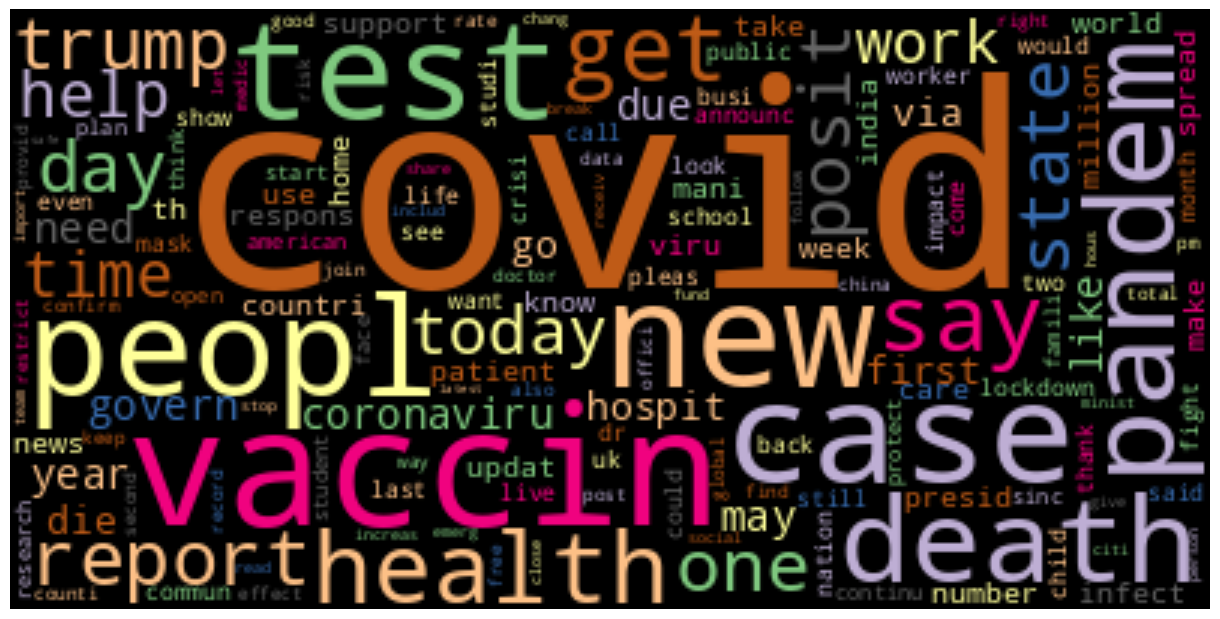

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from wordcloud import WordCloud

# 將 Spark DataFrame 轉換成 Python 字典
word_count_dict = dict(word_count_df.rdd.map(lambda row: (row['word'], row['count'])).collect())

wordcloud = WordCloud(colormap = 'Accent', background_color = 'black').generate_from_frequencies(word_count_dict)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('top_30_cloud.png')


plt.show()

In [ ]:
used_df.select("created_at").printSchema()

root
 |-- created_at: string (nullable = true)



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, desc, year, col, to_date

# 初始化 Spark Session
spark = SparkSession.builder.appName("YearlyWordFrequencyAnalysis").getOrCreate()

# 過濾奇怪的資料
filtered_df = used_df.filter(used_df["created_at"].rlike("^\\d{4}-\\d{2}-\\d{2}$"))

# 將年份萃取出來
filtered_df = filtered_df.withColumn("created_at", to_date("created_at", "yyyy-MM-dd"))
filtered_df = filtered_df.withColumn("year", year("created_at"))

# 將單字拆分成多行，過濾掉空白字詞
exploded_df = filtered_df.select("year", "created_at", "clean_tweet_processed").selectExpr("year", "explode(split(clean_tweet_processed, ' ')) as word", "created_at").filter(col("word") != "")

# 計算每年單詞總頻率
word_count_df = exploded_df.groupBy("year", "word").count().orderBy("year", desc("count"))

# 分別篩選 2020 年和 2021 年的資料
word_count_2020_df = word_count_df.filter(word_count_df["year"] == 2020).select("word", "count").withColumnRenamed("count", "count_2020")
word_count_2021_df = word_count_df.filter(word_count_df["year"] == 2021).select("word", "count").withColumnRenamed("count", "count_2021")

# 顯示結果
print("word count of 2020")
word_count_2020_df.show(truncate=False)

print("word count of 2021")
word_count_2021_df.show(truncate=False)

word count of 2020
+----------+----------+
|word      |count_2020|
+----------+----------+
|covid     |109628    |
|test      |14226     |
|new       |13894     |
|case      |13239     |
|peopl     |11654     |
|death     |9143      |
|trump     |8735      |
|pandem    |8681      |
|health    |7871      |
|say       |7303      |
|posit     |7212      |
|report    |6697      |
|one       |6599      |
|day       |6245      |
|coronaviru|6155      |
|get       |6021      |
|state     |5963      |
|time      |5763      |
|today     |5636      |
|help      |5594      |
+----------+----------+
only showing top 20 rows

word count of 2021
+------+----------+
|word  |count_2021|
+------+----------+
|covid |58046     |
|vaccin|21873     |
|new   |7325      |
|case  |7019      |
|peopl |5992      |
|get   |5108      |
|pandem|4831      |
|health|4752      |
|india |4027      |
|report|3985      |
|death |3846      |
|test  |3753      |
|say   |3515      |
|one   |3338      |
|today |3216      |


In [ ]:
filtered_df.select("created_at").printSchema()

root
 |-- created_at: date (nullable = true)



In [ ]:
from pyspark.sql.functions import year, month, col

# 增加年、月欄位
filtered_df = used_df.filter(used_df["clean_tweet_processed"].isNotNull())  # 過濾掉空的 clean_tweet_processed

# 過濾奇怪的資料
filtered_df = filtered_df.filter(used_df["created_at"].rlike("^\\d{4}-\\d{2}-\\d{2}$"))

# 將年份萃取出來
filtered_df = filtered_df.withColumn("created_at", to_date("created_at", "yyyy-MM-dd"))
filtered_df = filtered_df.withColumn("year", year("created_at"))
filtered_df = filtered_df.withColumn("month", month("created_at"))

# 使用 explode 將 words 欄位拆分成多行
exploded_df = filtered_df.select("year", "month", "clean_tweet_processed").selectExpr("year", "explode(split(clean_tweet_processed, ' ')) as word", "month").filter(col("word") != "")

# 計算每個年月單字的出現次數
word_count_monthly_df = exploded_df.groupBy("year", "month", "word").count()

# 使用 window 函數計算每個年月單字的排名
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

window_spec = Window().partitionBy("year", "month").orderBy(desc("count"))

ranked_word_count_df = word_count_monthly_df.withColumn("rank", rank().over(window_spec))
top_words_df = ranked_word_count_df.filter(ranked_word_count_df["rank"] <= 5).select("year", "month", "word", "count")

# 過濾 2020 年的結果
top_words_2020_months_df = top_words_df.filter(col("year") == 2020).select("month", "word", "count")

# 過濾 2021 年的結果
top_words_2021_months_df = top_words_df.filter(col("year") == 2021).select("month", "word", "count")

# 顯示結果
print("Top 5 words in 2020 each months:")
top_words_2020_months_df.show(n=25, truncate=False)

print("Top 5 words in 2021 each months:")
top_words_2021_months_df.show(truncate=False)

Top 5 words in 2020 each months:
+-----+-----+-----+
|month|word |count|
+-----+-----+-----+
|4    |covid|13010|
|4    |new  |1486 |
|4    |test |1427 |
|4    |peopl|1418 |
|4    |death|1209 |
|5    |covid|41220|
|5    |new  |4775 |
|5    |case |4379 |
|5    |test |4370 |
|5    |peopl|4260 |
|6    |covid|7116 |
|6    |test |902  |
|6    |case |900  |
|6    |new  |887  |
|6    |peopl|779  |
|8    |covid|5049 |
|8    |case |763  |
|8    |test |703  |
|8    |new  |684  |
|8    |peopl|561  |
|9    |covid|20585|
|9    |test |2999 |
|9    |case |2963 |
|9    |new  |2857 |
|9    |peopl|2298 |
+-----+-----+-----+
only showing top 25 rows

Top 5 words in 2021 each months:
+-----+------+-----+
|month|word  |count|
+-----+------+-----+
|4    |covid |3244 |
|4    |vaccin|1114 |
|4    |india |641  |
|4    |case  |394  |
|4    |peopl |357  |
|5    |covid |27102|
|5    |vaccin|9890 |
|5    |new   |3272 |
|5    |case  |3252 |
|5    |peopl |2845 |
|6    |covid |27700|
|6    |vaccin|10869|
|6    |new   

In [ ]:
filtered_df.head()

Row(created_at=datetime.date(2020, 4, 19), favorite_count='0.0', retweet_count='31.0', hashtags=None, user_mentions='GlblCtzn, priyankachopra', clean_tweet_processed='call leader help protect refuge covid provid qualiti health care', year=2020, month=4)

In [ ]:
exploded_df.head()

Row(year=2020, word='call', month=4)

In [ ]:
word_count_monthly_df.head(5)

[Row(year=2020, month=4, word='pa', count=86),
 Row(year=2020, month=4, word='neg', count=72),
 Row(year=2020, month=4, word='financi', count=103),
 Row(year=2020, month=4, word='view', count=78),
 Row(year=2020, month=4, word='crimin', count=26)]

In [ ]:
# 計算每年單詞總頻率
word_count_yearly_df = exploded_df.groupBy("year", "word").count().orderBy("year", desc("count"))

# 顯示結果
print("word count of 2020 yearly")
word_count_yearly_2020_df = word_count_yearly_df.filter(col("year") == 2020).select("word", "count")
word_count_yearly_2020_df.show(truncate=False)

print("word count of 2021 yearly")
word_count_yearly_2021_df = word_count_yearly_df.filter(col("year") == 2021).select("word", "count")
word_count_yearly_2021_df.show(truncate=False)

word count of 2020 yearly
+----------+------+
|word      |count |
+----------+------+
|covid     |109628|
|test      |14226 |
|new       |13894 |
|case      |13239 |
|peopl     |11654 |
|death     |9143  |
|trump     |8735  |
|pandem    |8681  |
|health    |7871  |
|say       |7303  |
|posit     |7212  |
|report    |6697  |
|one       |6599  |
|day       |6245  |
|coronaviru|6155  |
|get       |6021  |
|state     |5963  |
|time      |5763  |
|today     |5636  |
|help      |5594  |
+----------+------+
only showing top 20 rows

word count of 2021 yearly
+------+-----+
|word  |count|
+------+-----+
|covid |58046|
|vaccin|21873|
|new   |7325 |
|case  |7019 |
|peopl |5992 |
|get   |5108 |
|pandem|4831 |
|health|4752 |
|india |4027 |
|report|3985 |
|death |3846 |
|test  |3753 |
|say   |3515 |
|one   |3338 |
|today |3216 |
|day   |3188 |
|may   |3176 |
|year  |3061 |
|state |3016 |
|first |2816 |
+------+-----+
only showing top 20 rows



#### hashtags analysis

In [ ]:
from pyspark.sql.functions import split, explode, col, count

# 過濾掉 hashtags 為 NULL 的資料
filtered_hashtags_df = used_df.filter(used_df["hashtags"].isNotNull())

# 將 hashtags 欄位以逗號分隔，使用 explode 將多個 hashtags 拆分成不同行
exploded_hashtags_df = filtered_hashtags_df.select("hashtags") \
    .withColumn("hashtag", explode(split("hashtags", ",\s*")))

# 計算每個 hashtag 的出現次數
hashtag_count_df = exploded_hashtags_df.groupBy("hashtag").agg(count("*").alias("count"))

# 按次數降序排序
sorted_hashtags_df = hashtag_count_df.orderBy(col("count").desc())

# 顯示結果
print("Most Frequent Hashtags of data")
sorted_hashtags_df.show(truncate=False)

Most Frequent Hashtags of data
+--------------------+-----+
|hashtag             |count|
+--------------------+-----+
|COVID19             |8632 |
|coronavirus         |4683 |
|COVID               |4173 |
|Covid_19            |3293 |
|Covid               |2457 |
|covid               |1429 |
|lockdown            |1251 |
|Coronavirus         |1250 |
|India               |1032 |
|COVID__19           |966  |
|Covid19             |953  |
|covid19             |831  |
|StaySafe            |754  |
|0.0                 |657  |
|BREAKING            |514  |
|KeepingOurPromiseAct|464  |
|HR3548              |461  |
|USA                 |440  |
|pandemic            |401  |
|StayHome            |378  |
+--------------------+-----+
only showing top 20 rows



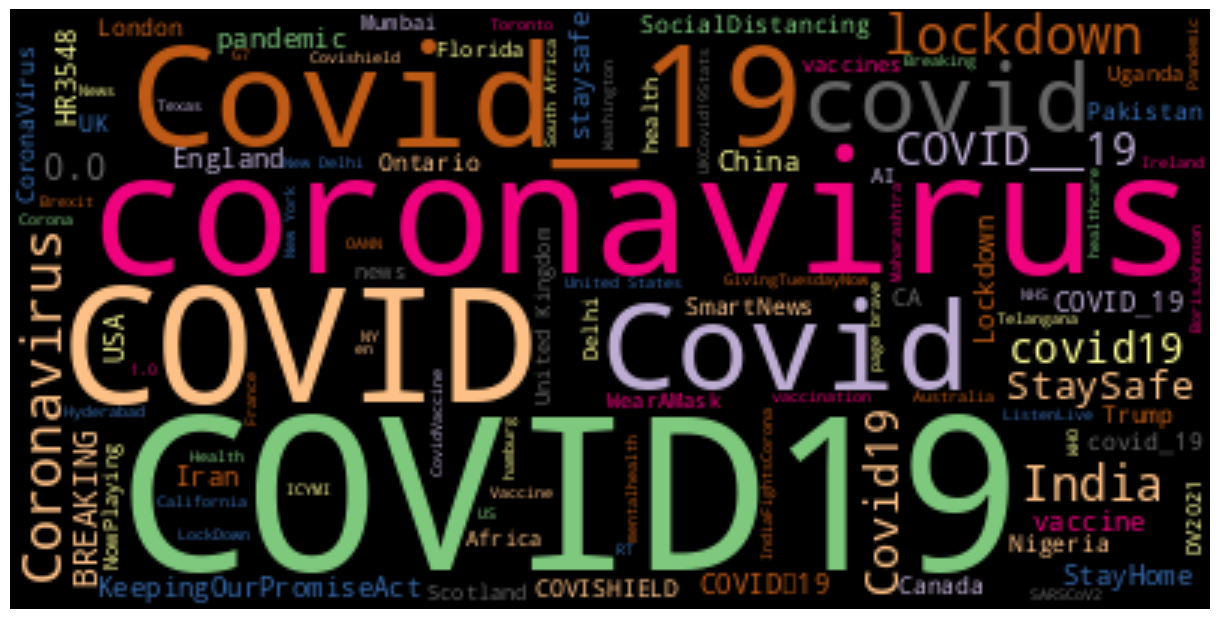

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from wordcloud import WordCloud

# 將 Spark DataFrame 轉換成 Python 字典
hashtags_count_dict = dict(sorted_hashtags_df.rdd.map(lambda row: (row['hashtag'], row['count'])).collect())

wordcloud_tags = WordCloud(colormap='Accent', background_color='black').generate_from_frequencies(hashtags_count_dict)

# 繪製 WordCloud for hashtags
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_tags, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('top_30_cloud.png')


plt.show()

In [ ]:
from pyspark.sql.functions import split, explode, col, count, to_date, year, desc

# 過濾掉 hashtags 為 NULL 的資料
filtered_hashtags_df = used_df.filter(used_df["hashtags"].isNotNull())

# 對 hashtags 欄位進行處理，分割成行數據
hashtags_df = used_df.select("created_at", "hashtags").filter(col("hashtags").isNotNull())
exploded_hashtags_df = hashtags_df.select("created_at", explode(split("hashtags", ",\s*")).alias("hashtag"))

# 過濾奇怪的資料
hashtags_yearly_df = exploded_hashtags_df.filter(exploded_hashtags_df["created_at"].rlike("^\\d{4}-\\d{2}-\\d{2}$"))

# 將年份萃取出來
hashtags_yearly_df = hashtags_yearly_df.withColumn("created_at", to_date("created_at", "yyyy-MM-dd"))
hashtags_yearly_df = hashtags_yearly_df.withColumn("year", year("created_at"))

# 計算每年單詞總頻率
hashtags_year_count_df = hashtags_yearly_df.groupBy("year", "hashtag").count().orderBy("year", desc("count"))

# 分別篩選 2020 年和 2021 年的資料
hashtags_count_2020_df = hashtags_year_count_df.filter(hashtags_year_count_df["year"] == 2020).select("hashtag", "count").withColumnRenamed("count", "count_2020")
hashtags_count_2021_df = hashtags_year_count_df.filter(hashtags_year_count_df["year"] == 2021).select("hashtag", "count").withColumnRenamed("count", "count_2021")

# 顯示結果
print("hashtags count of 2020")
hashtags_count_2020_df.show(truncate=False)

print("hashtags count of 2021")
hashtags_count_2021_df.show(truncate=False)

hashtags count of 2020
+----------------+----------+
|hashtag         |count_2020|
+----------------+----------+
|COVID19         |5698      |
|coronavirus     |3415      |
|Covid_19        |2870      |
|COVID           |2222      |
|Covid           |997       |
|COVID__19       |959       |
|Coronavirus     |885       |
|lockdown        |644       |
|Covid19         |637       |
|covid           |614       |
|covid19         |529       |
|0.0             |420       |
|StaySafe        |417       |
|BREAKING        |289       |
|COVIDー19       |278       |
|COVID_19        |273       |
|pandemic        |249       |
|Trump           |218       |
|SocialDistancing|188       |
|staysafe        |183       |
+----------------+----------+
only showing top 20 rows

hashtags count of 2021
+--------------------+----------+
|hashtag             |count_2021|
+--------------------+----------+
|COVID19             |2906      |
|COVID               |1937      |
|Covid               |1455      |
|coro

In [ ]:
from pyspark.sql.functions import split, explode, col, count, to_date, year, month, desc


# 增加年、月欄位
filtered_df = used_df.filter(used_df["hashtags"].isNotNull())  # 過濾掉空的 hashtags

# 過濾奇怪的資料
filtered_df = filtered_df.filter(used_df["created_at"].rlike("^\\d{4}-\\d{2}-\\d{2}$"))

# 將年份萃取出來
filtered_df = filtered_df.withColumn("created_at", to_date("created_at", "yyyy-MM-dd"))
filtered_df = filtered_df.withColumn("year", year("created_at"))
filtered_df = filtered_df.withColumn("month", month("created_at"))

# 使用 explode 將 hashtags 欄位拆分成多行
exploded_hashtags_df = filtered_df.select("year", "month", explode(split("hashtags", ",\s*")).alias("hashtag"))
#exploded_df = filtered_df.select("year", "month", "hashtags").selectExpr("year", "explode(split(hashtags, \",\s*\")) as hashtag", "month").filter(col("hashtag") != "")

# 計算每個年月hashtag的出現次數
tag_count_monthly_df = exploded_hashtags_df.groupBy("year", "month", "hashtag").count()

# 使用 window 函數計算每個年月單字的排名
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

window_spec = Window().partitionBy("year", "month").orderBy(desc("count"))

ranked_tag_count_df = tag_count_monthly_df.withColumn("rank", rank().over(window_spec))
top_tags_df = ranked_tag_count_df.filter(ranked_word_count_df["rank"] <= 5).select("year", "month", "hashtag", "count")

# 過濾 2020 年的結果
top_tags_2020_months_df = top_tags_df.filter(col("year") == 2020).select("month", "hashtag", "count")

# 過濾 2021 年的結果
top_tags_2021_months_df = top_tags_df.filter(col("year") == 2021).select("month", "hashtag", "count")

# 顯示結果
print("Top 5 hashtags in 2020 each months:")
top_tags_2020_months_df.show(n=25, truncate=False)

print("Top 5 hashtags in 2021 each months:")
top_tags_2021_months_df.show(truncate=False)

Top 5 words in 2020 each months:
+-----+-----------+-----+
|month|hashtag    |count|
+-----+-----------+-----+
|4    |Covid_19   |718  |
|4    |COVID19    |699  |
|4    |coronavirus|235  |
|4    |COVID      |178  |
|4    |COVID__19  |75   |
|5    |COVID19    |2042 |
|5    |Covid_19   |1446 |
|5    |COVID      |560  |
|5    |coronavirus|547  |
|5    |COVID__19  |467  |
|6    |COVID19    |387  |
|6    |Covid_19   |127  |
|6    |COVID      |83   |
|6    |COVID__19  |75   |
|6    |coronavirus|68   |
|8    |coronavirus|272  |
|8    |COVID19    |248  |
|8    |COVID      |156  |
|8    |Coronavirus|82   |
|8    |Covid_19   |73   |
|9    |COVID19    |1211 |
|9    |coronavirus|1160 |
|9    |COVID      |550  |
|9    |Covid      |361  |
|9    |Coronavirus|286  |
+-----+-----------+-----+
only showing top 25 rows

Top 5 words in 2021 each months:
+-----+--------------------+-----+
|month|hashtag             |count|
+-----+--------------------+-----+
|4    |COVID19             |176  |
|4    |Covid  

#### user mention analysis

In [ ]:
from pyspark.sql.functions import split, explode, col, count

# 過濾掉 hashtags 為 NULL 的資料
filtered_mention_df = used_df.filter(used_df["user_mentions"].isNotNull())

# 將 hashtags 欄位以逗號分隔，使用 explode 將多個 hashtags 拆分成不同行
exploded_mention_df = filtered_mention_df.select("user_mentions") \
    .withColumn("mention", explode(split("user_mentions", ",\s*")))

# 計算每個 hashtag 的出現次數
mention_count_df = exploded_mention_df.groupBy("mention").agg(count("*").alias("count"))

# 按次數降序排序
sorted_mention_df = mention_count_df.orderBy(col("count").desc())

# 顯示結果
print("Most Frequent mention of data")
sorted_mention_df.show(truncate=False)

Most Frequent mention of data
+---------------+-----+
|mention        |count|
+---------------+-----+
|0.0            |41331|
|-0.5994        |3652 |
|realDonaldTrump|2956 |
|0.4019         |2144 |
|0.4404         |1799 |
|0.3612         |1755 |
|0.0772         |1611 |
|0.4939         |1539 |
|-0.3818        |1538 |
|0.296          |1346 |
|0.3818         |1114 |
|-0.2732        |1088 |
|YouTube        |1032 |
|0.5106         |962  |
|0.2023         |949  |
|Reuters        |937  |
|-0.3182        |922  |
|-0.34          |871  |
|0.0258         |859  |
|0.3182         |825  |
+---------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import split, explode, col, count

# 過濾掉 user_mentions 為 NULL 的資料
filtered_mention_df = used_df.filter(used_df["user_mentions"].isNotNull())

# 將 mention 欄位以逗號分隔，使用 explode 將多個 hashtags 拆分成不同行
exploded_mention_df = filtered_mention_df.select("user_mentions") \
    .withColumn("mention", explode(split("user_mentions", ",\s*")))

# 再把資料過濾一次，不要出現數值資料
exploded_mention_df = exploded_mention_df.filter(exploded_mention_df["mention"].rlike("[A-Za-z]"))

# 計算每個 user_mentions 的出現次數
mention_count_df = exploded_mention_df.groupBy("mention").agg(count("*").alias("count"))

# 按次數降序排序
sorted_mention_df = mention_count_df.orderBy(col("count").desc())

# 顯示結果
print("Most Frequent mention of data")
sorted_mention_df.show(truncate=False)

Most Frequent mention of data
+---------------+-----+
|mention        |count|
+---------------+-----+
|realDonaldTrump|2956 |
|YouTube        |1032 |
|Reuters        |937  |
|narendramodi   |801  |
|SkyNews        |765  |
|CNN            |716  |
|WHO            |607  |
|BorisJohnson   |597  |
|JoeBiden       |569  |
|ABC            |546  |
|POTUS          |523  |
|thehill        |509  |
|PMOIndia       |404  |
|PTI_News       |395  |
|WhiteHouse     |392  |
|nytimes        |381  |
|RepRitchie     |378  |
|CDCgov         |374  |
|TheEconomist   |371  |
|NBCNews        |370  |
+---------------+-----+
only showing top 20 rows



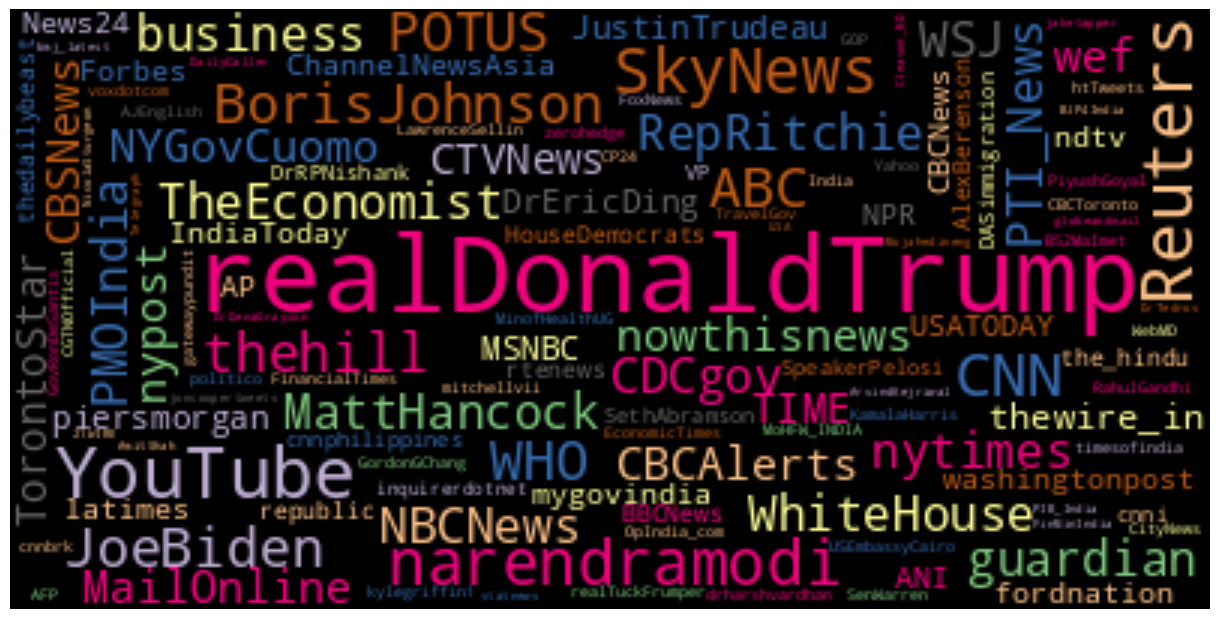

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from wordcloud import WordCloud

# 將 Spark DataFrame 轉換成 Python 字典
mentions_count_dict = dict(sorted_mention_df.rdd.map(lambda row: (row['mention'], row['count'])).collect())

wordcloud_mentions = WordCloud(colormap='Accent', background_color='black').generate_from_frequencies(mentions_count_dict)

# 繪製 WordCloud for hashtags
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_mentions, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('top_30_cloud.png')


plt.show()

In [ ]:
from pyspark.sql.functions import split, explode, col, count, to_date, year, desc

# 過濾掉 hashtags 為 NULL 的資料
filtered_mention_df = used_df.filter(used_df["user_mentions"].isNotNull())

# 將 hashtags 欄位以逗號分隔，使用 explode 將多個 hashtags 拆分成不同行
exploded_mention_df = filtered_mention_df.select("created_at", "user_mentions") \
    .withColumn("mention", explode(split("user_mentions", ",\s*")))

# 再把資料過濾一次，不要出現數值資料
exploded_mention_df = exploded_mention_df.filter(exploded_mention_df["mention"].rlike("[A-Za-z]"))

# 過濾奇怪的資料
mentions_yearly_df = exploded_mention_df.filter(exploded_mention_df["created_at"].rlike("^\\d{4}-\\d{2}-\\d{2}$"))

# 將年份萃取出來
mentions_yearly_df = mentions_yearly_df.withColumn("created_at", to_date("created_at", "yyyy-MM-dd"))
mentions_yearly_df = mentions_yearly_df.withColumn("year", year("created_at"))

# 計算每年單詞總頻率
mentions_year_count_df = mentions_yearly_df.groupBy("year", "mention").count().orderBy("year", desc("count"))

# 分別篩選 2020 年和 2021 年的資料
mentions_count_2020_df = mentions_year_count_df.filter(mentions_year_count_df["year"] == 2020).select("mention", "count").withColumnRenamed("count", "count_2020")
mentions_count_2021_df = mentions_year_count_df.filter(mentions_year_count_df["year"] == 2021).select("mention", "count").withColumnRenamed("count", "count_2021")

# 顯示結果
print("mentions count of 2020")
mentions_count_2020_df.show(truncate=False)

print("mentions count of 2021")
mentions_count_2021_df.show(truncate=False)

mentions count of 2020
+---------------+----------+
|mention        |count_2020|
+---------------+----------+
|realDonaldTrump|2943      |
|YouTube        |706       |
|CNN            |544       |
|JoeBiden       |482       |
|Reuters        |468       |
|SkyNews        |464       |
|narendramodi   |422       |
|BorisJohnson   |402       |
|ABC            |387       |
|WHO            |372       |
|thehill        |339       |
|guardian       |313       |
|NBCNews        |278       |
|TheEconomist   |268       |
|MattHancock    |256       |
|nowthisnews    |252       |
|CBSNews        |252       |
|business       |245       |
|NYGovCuomo     |242       |
|nytimes        |234       |
+---------------+----------+
only showing top 20 rows

mentions count of 2021
+--------------+----------+
|mention       |count_2021|
+--------------+----------+
|Reuters       |469       |
|narendramodi  |378       |
|RepRitchie    |378       |
|YouTube       |326       |
|POTUS         |310       |
|SkyNews

In [ ]:
exploded_mention_df.head()

Row(user_mentions='GlblCtzn, priyankachopra', mention='GlblCtzn')

In [ ]:
filtered_mention_df.head()

Row(created_at='2020-04-19', favorite_count='0.0', retweet_count='31.0', hashtags=None, user_mentions='GlblCtzn, priyankachopra', clean_tweet_processed='call leader help protect refuge covid provid qualiti health care')

In [ ]:
from pyspark.sql.functions import split, explode, col, count, to_date, year, month, desc


# 增加年、月欄位
filtered_df = used_df.filter(used_df["user_mentions"].isNotNull())  # 過濾掉空的 hashtags

# 過濾奇怪的資料
filtered_df = filtered_df.filter(used_df["created_at"].rlike("^\\d{4}-\\d{2}-\\d{2}$"))

# 將年份萃取出來
filtered_df = filtered_df.withColumn("created_at", to_date("created_at", "yyyy-MM-dd"))
filtered_df = filtered_df.withColumn("year", year("created_at"))
filtered_df = filtered_df.withColumn("month", month("created_at"))

# 使用 explode 將 user_mentions 欄位拆分成多行
exploded_mentions_df = filtered_df.select("year", "month", explode(split("user_mentions", ",\s*")).alias("mention"))
#exploded_df = filtered_df.select("year", "month", "hashtags").selectExpr("year", "explode(split(hashtags, \",\s*\")) as hashtag", "month").filter(col("hashtag") != "")

# 計算每個年月mention的出現次數
mention_count_monthly_df = exploded_mentions_df.groupBy("year", "month", "mention").count()

# 使用 window 函數計算每個年月單字的排名
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

window_spec = Window().partitionBy("year", "month").orderBy(desc("count"))

ranked_mention_count_df = mention_count_monthly_df.withColumn("rank", rank().over(window_spec))
top_mentions_df = ranked_mention_count_df.filter(ranked_mention_count_df["rank"] <= 5).select("year", "month", "mention", "count")

# 過濾 2020 年的結果
top_mentions_2020_months_df = top_mentions_df.filter(col("year") == 2020).select("month", "mention", "count")

# 過濾 2021 年的結果
top_mentions_2021_months_df = top_mentions_df.filter(col("year") == 2021).select("month", "mention", "count")

# 顯示結果
print("Top 5 mentions in 2020 each months:")
top_mentions_2020_months_df.show(n=25, truncate=False)

print("Top 5 mentions in 2021 each months:")
top_mentions_2021_months_df.show(truncate=False)

Top 5 mentions in 2020 each months:
+-----+---------------+-----+
|month|mention        |count|
+-----+---------------+-----+
|4    |realDonaldTrump|332  |
|4    |YouTube        |135  |
|4    |ABC            |71   |
|4    |CNN            |70   |
|4    |WHO            |67   |
|5    |realDonaldTrump|867  |
|5    |YouTube        |308  |
|5    |CNN            |171  |
|5    |narendramodi   |162  |
|5    |Reuters        |144  |
|6    |realDonaldTrump|135  |
|6    |CNN            |41   |
|6    |narendramodi   |40   |
|6    |WHO            |27   |
|6    |guardian       |26   |
|8    |realDonaldTrump|96   |
|8    |narendramodi   |40   |
|8    |JoeBiden       |38   |
|8    |PMOIndia       |33   |
|8    |Reuters        |32   |
|9    |realDonaldTrump|467  |
|9    |JoeBiden       |155  |
|9    |BorisJohnson   |135  |
|9    |SkyNews        |122  |
|9    |Reuters        |98   |
+-----+---------------+-----+
only showing top 25 rows

Top 5 mentions in 2021 each months:
+-----+--------------+-----+
|mo

## Model Building

In [ ]:
# 先整理出需要的資料欄位

from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType

spark = SparkSession.builder.appName("used df").getOrCreate()

# change the function to udf type
# remove_tags_udf = udf(remove_tags, StringType())
# preprocess_text_udf = udf(preprocess_text, StringType())

# deal with the none situation
clean_tweet_processed_udf = udf(lambda text: preprocess_text(remove_tags(text)) if text else "", StringType())


# preprocessing the clean_tweet column, and rebuild the data frame what we need
model_used_df = combined_df.withColumn("clean_tweet_processed", clean_tweet_processed_udf("clean_tweet")) \
                    .select("created_at", "clean_tweet_processed", "sentiment")

# show the outcome to check
model_used_df.show(truncate=False)

+----------+-------------------------------------------------------------------------------------+---------+
|created_at|clean_tweet_processed                                                                |sentiment|
+----------+-------------------------------------------------------------------------------------+---------+
|2020-04-19|call leader help protect refuge covid provid qualiti health care                     |pos      |
|2020-04-19|ogun state support cbn nirsal covid target credit facil tcf                          |pos      |
|2020-04-19|polic offici base namahadi polic station busi drink liquor certain tavern whilst duti|pos      |
|2020-04-19|                                                                                     |NULL     |
|en        |                                                                                     |NULL     |
|2020-04-19|condol famili surviv                                                                 |neu      |
|2020-04-19|receiv 

In [ ]:
# 過濾掉sentiment為空的狀況
filtered_model_used_df = model_used_df.filter(model_used_df["sentiment"].isNotNull())
filtered_model_used_df.show(truncate=False)

+----------+-------------------------------------------------------------------------------------+---------+
|created_at|clean_tweet_processed                                                                |sentiment|
+----------+-------------------------------------------------------------------------------------+---------+
|2020-04-19|call leader help protect refuge covid provid qualiti health care                     |pos      |
|2020-04-19|ogun state support cbn nirsal covid target credit facil tcf                          |pos      |
|2020-04-19|polic offici base namahadi polic station busi drink liquor certain tavern whilst duti|pos      |
|2020-04-19|condol famili surviv                                                                 |neu      |
|2020-04-19|receiv text year old son work covid patient equat quarantin com                      |neu      |
|2020-04-19|taiwan vice presid chen chien jen countri fight covid                                |neg      |
|2020-04-19|break n

In [ ]:
filtered_model_used_df.filter(col("sentiment").isNull()).show()

+----------+---------------------+---------+
|created_at|clean_tweet_processed|sentiment|
+----------+---------------------+---------+
+----------+---------------------+---------+



In [ ]:
filtered_model_used_df.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- clean_tweet_processed: string (nullable = true)
 |-- sentiment: string (nullable = true)



In [ ]:
# 查看 distinct 的 sentiment 值
distinct_sentiments = filtered_model_used_df.select("sentiment").distinct()

# 過濾出不是 'pos'、'neu'、'neg' 的資料
other_sentiments_df = distinct_sentiments.filter(
    (col("sentiment") != "pos") & (col("sentiment") != "neu") & (col("sentiment") != "neg")
)

# 顯示表格
other_sentiments_df.show(truncate=False)

+---------+
|sentiment|
+---------+
|0.151    |
|0.216    |
|0.157    |
|1.0      |
|0.147    |
|0.762    |
|0.671    |
|0.358    |
|0.272    |
|0.595    |
|0.647    |
|0.621    |
|0.341    |
|0.577    |
|0.763    |
|0.391    |
|0.641    |
|0.506    |
|0.566    |
|0.523    |
+---------+
only showing top 20 rows



In [ ]:
other_sentiments_df.printSchema()

root
 |-- sentiment: string (nullable = true)



In [ ]:
from pyspark.sql.functions import when, col

# 選擇 sentiment 欄位中不是 pos, neu, neg 的資料
other_sentiments_df = filtered_model_used_df.filter(~filtered_model_used_df['sentiment'].isin(['pos', 'neu', 'neg']))

# 將 'sentiment' 列轉換為浮點數型態
other_sentiments_df = other_sentiments_df.withColumn('sentiment', other_sentiments_df['sentiment'].cast('float'))

# 從 filtered_model_used_df 中刪除 other_sentiments_df 的資料
filtered_model_used_df = filtered_model_used_df.join(other_sentiments_df, on='sentiment', how='left_anti')

# 對 sentiment 欄位進行轉換
other_sentiments_df = other_sentiments_df.withColumn(
    'sentiment',
    when(other_sentiments_df['sentiment'] > 0.5, 'pos')
    .when(other_sentiments_df['sentiment'] == 0.5, 'neu')
    .otherwise('neg')
)

# 如果需要，將 other_sentiments_df 加回 filtered_model_used_df
filtered_model_used_df = filtered_model_used_df.unionByName(other_sentiments_df)

filtered_model_used_df = filtered_model_used_df.select(
    'created_at',
    'clean_tweet_processed',
    'sentiment',
)

# 顯示other_sentiments_df結果
other_sentiments_df.show()

# 顯示結果
filtered_model_used_df.show()

+----------+---------------------+---------+
|created_at|clean_tweet_processed|sentiment|
+----------+---------------------+---------+
|2020-04-19|                     |      neg|
|2020-04-19|            wagsphoto|      pos|
|2020-04-22|              buffalo|      neg|
|2020-04-22|                     |      neg|
|2020-04-22|             huffpost|      pos|
|2020-04-22|                     |      neg|
|2020-04-22| cbsnews keishabot...|      pos|
|2020-04-22|     montreal canadia|      neg|
|2020-04-22|              ireland|      neg|
|2020-04-22|                     |      pos|
|2020-04-22|                  usa|      neg|
|2020-04-22|   greater chicago il|      neg|
|2020-04-22|             new conn|      neg|
|2020-04-22|            albany ny|      neg|
|2020-04-22| rarely read priva...|      neg|
|2020-04-22|            lititz pa|      neg|
|2020-04-22|                     |      neg|
|2020-04-22|              offices|      neg|
|2020-04-22|        winchester va|      neg|
|2020-04-2

In [ ]:
# 查看 sentiment 欄位為 NULL 的資料
null_other_sentiments_df = other_sentiments_df.filter(col('sentiment').isNull())

# 顯示結果
null_other_sentiments_df.show()

+----------+---------------------+---------+
|created_at|clean_tweet_processed|sentiment|
+----------+---------------------+---------+
+----------+---------------------+---------+



In [ ]:
from pyspark.sql.functions import when

# 定義轉換條件
sentiment_mapping = {
    'pos': 2,
    'neu': 1,
    'neg': 0
}

# 使用 withColumn 進行轉換
transformed_model_used_df = filtered_model_used_df.withColumn(
    'sentiment',
    when(filtered_model_used_df['sentiment'] == 'pos', sentiment_mapping['pos'])
    .when(filtered_model_used_df['sentiment'] == 'neu', sentiment_mapping['neu'])
    .when(filtered_model_used_df['sentiment'] == 'neg', sentiment_mapping['neg'])
)

# 顯示轉換後的 DataFrame
transformed_model_used_df.show()

+----------+---------------------+---------+
|created_at|clean_tweet_processed|sentiment|
+----------+---------------------+---------+
|2020-04-19| call leader help ...|        2|
|2020-04-19| ogun state suppor...|        2|
|2020-04-19| polic offici base...|        2|
|2020-04-19| condol famili surviv|        1|
|2020-04-19| receiv text year ...|        1|
|2020-04-19| taiwan vice presi...|        0|
|2020-04-19| break new york wo...|        0|
|2020-04-19| horribl tragedi n...|        1|
|2020-04-19| covid cure sooner...|        1|
|2020-04-19| januari nd total ...|        1|
|2020-04-19| covid attack almo...|        0|
|2020-04-19| prevent key know ...|        2|
|2020-04-19| break jigawa reco...|        1|
|2020-04-19| wallac pelosi als...|        0|
|2020-04-19| iphrc condemn unr...|        0|
|2020-04-19| tail leg open sta...|        1|
|2020-04-19| offic say speak m...|        1|
|2020-04-19| covid alberta doc...|        0|
|2020-04-19| cours still right...|        1|
|2020-04-1

In [ ]:
transformed_model_used_df.filter(col("sentiment").isNull()).show()

+--------------------+---------------------+---------+
|          created_at|clean_tweet_processed|sentiment|
+--------------------+---------------------+---------+
|          2020-04-24|                     |     NULL|
|          2020-04-25|                     |     NULL|
|          2020-04-28|                     |     NULL|
|          2020-05-03|                     |     NULL|
|          2020-05-11|                     |     NULL|
|          2020-05-12|                     |     NULL|
|          2020-05-16|                     |     NULL|
|          2020-05-18|                     |     NULL|
|                Gran|                     |     NULL|
|          2020-06-13|                     |     NULL|
|          GERMANTOWN|                     |     NULL|
|          2021-04-30|                     |     NULL|
|125 New Cases in LKO|                     |     NULL|
|           GALESBURG|                     |     NULL|
|          2021-05-03|                     |     NULL|
|         

In [ ]:
transformed_model_used_df.filter(col("sentiment").isNull()).count()

35

In [ ]:
# 捨棄 sentiment 欄位為 NULL 的資料
model_final_used_df = transformed_model_used_df.filter(col('sentiment').isNotNull())

# 顯示結果
model_final_used_df.show()

+----------+---------------------+---------+
|created_at|clean_tweet_processed|sentiment|
+----------+---------------------+---------+
|2020-04-19| call leader help ...|        2|
|2020-04-19| ogun state suppor...|        2|
|2020-04-19| polic offici base...|        2|
|2020-04-19| condol famili surviv|        1|
|2020-04-19| receiv text year ...|        1|
|2020-04-19| taiwan vice presi...|        0|
|2020-04-19| break new york wo...|        0|
|2020-04-19| horribl tragedi n...|        1|
|2020-04-19| covid cure sooner...|        1|
|2020-04-19| januari nd total ...|        1|
|2020-04-19| covid attack almo...|        0|
|2020-04-19| prevent key know ...|        2|
|2020-04-19| break jigawa reco...|        1|
|2020-04-19| wallac pelosi als...|        0|
|2020-04-19| iphrc condemn unr...|        0|
|2020-04-19| tail leg open sta...|        1|
|2020-04-19| offic say speak m...|        1|
|2020-04-19| covid alberta doc...|        0|
|2020-04-19| cours still right...|        1|
|2020-04-1

In [ ]:
from pyspark.ml.feature import Tokenizer, CountVectorizer
from pyspark.ml import Pipeline

# 創建 Tokenizer 實例，將文本分割成單詞
tokenizer = Tokenizer(inputCol="clean_tweet_processed", outputCol="words")

# 創建 CountVectorizer 實例，將單詞轉換為詞頻特徵
vectorizer = CountVectorizer(inputCol="words", outputCol="features", vocabSize=1000, minDF=5)

# 建立情緒分析 Pipeline
pipeline = Pipeline(stages=[tokenizer, vectorizer])

# 使用 Pipeline 擬合和轉換資料
model = pipeline.fit(model_final_used_df)
result = model.transform(model_final_used_df)

# 顯示轉換結果
result.select("created_at", "clean_tweet_processed", "features", "sentiment").show(truncate=False)

+----------+-------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+---------+
|created_at|clean_tweet_processed                                                                |features                                                                             |sentiment|
+----------+-------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+---------+
|2020-04-19|call leader help protect refuge covid provid qualiti health care                     |(1000,[0,8,19,46,57,103,107,218],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                  |2        |
|2020-04-19|ogun state support cbn nirsal covid target credit facil tcf                          |(1000,[0,16,41,510,936],[1.0,1.0,1.0,1.0,1.0])                                       |2        |
|2020-04-19|polic offici 

In [ ]:
result.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- clean_tweet_processed: string (nullable = true)
 |-- sentiment: integer (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)



In [ ]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler

# 創建 OneHotEncoder 物件
encoder = OneHotEncoder(inputCols=["sentiment"], outputCols=["sentiment_onehot"])

# 將 OneHotEncoder 加入到 Pipeline 中，同時將特徵和 One-Hot 編碼的欄位組合成一個向量
pipeline = Pipeline(stages=[encoder])
transformed_data_onehot = pipeline.fit(result).transform(result)

# 顯示轉換後的資料
transformed_data_onehot.select("created_at", "clean_tweet_processed", "features", "sentiment", "sentiment_onehot").show(truncate=False)

+----------+-------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+---------+----------------+
|created_at|clean_tweet_processed                                                                |features                                                                             |sentiment|sentiment_onehot|
+----------+-------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+---------+----------------+
|2020-04-19|call leader help protect refuge covid provid qualiti health care                     |(1000,[0,8,19,46,57,103,107,218],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                  |2        |(2,[],[])       |
|2020-04-19|ogun state support cbn nirsal covid target credit facil tcf                          |(1000,[0,16,41,510,936],[1.0,1.0,1.0,1.0,1.0])        

In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

# # 定義特徵欄位
# feature_cols = ['created_at', 'features']

# # 建立 VectorAssembler
# vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol='features_processed')

# # 使用 VectorAssembler 轉換資料
# transformed_data = vector_assembler.transform(result)

# 設定訓練資料和測試資料的比例
train_ratio = 0.7
test_ratio = 1 - train_ratio

# 使用 randomSplit 分割資料
train_data, test_data = transformed_data_onehot.randomSplit([train_ratio, test_ratio], seed=42)

# 顯示分割後的資料
print("Training Data Count: ", train_data.count())
print("Testing Data Count: ", test_data.count())


Training Data Count:  211617
Testing Data Count:  90155


In [ ]:
train_data.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- clean_tweet_processed: string (nullable = true)
 |-- sentiment: integer (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)
 |-- features_processed: vector (nullable = true)



In [ ]:
train_data.filter(col("sentiment").isNull()).show()

+----------+---------------------+---------+-----+--------+------------------+
|created_at|clean_tweet_processed|sentiment|words|features|features_processed|
+----------+---------------------+---------+-----+--------+------------------+
+----------+---------------------+---------+-----+--------+------------------+



In [ ]:
# 第一版本的train_data，發現features和features_processed根本一樣
train_data.show(truncate=False)

+-------------------------------------+------------------------------------------------------------------------------------+---------+----------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+---------------------------------------------------------------------------------+
|created_at                           |clean_tweet_processed                                                               |sentiment|words                                                                                               |features                                                                         |features_processed                                                               |
+-------------------------------------+------------------------------------------------------------------------------------+---------+------------------------------------------------------------------

In [ ]:
# 第二版本的train_data，發現應該要先把one hot做好後再分割訓練與測試資料
train_data.show(truncate=False)

+-------------------------------------+------------------------------------------------------------------------------------+---------+----------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+
|created_at                           |clean_tweet_processed                                                               |sentiment|words                                                                                               |features                                                                         |
+-------------------------------------+------------------------------------------------------------------------------------+---------+----------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+
|NULL                                 |       

In [ ]:
"""
明天要改地方

1. 先做one hot, 全部都做好才做資料分割
2. 模型順序：CNN, LSTM, BERT, CNN+LSTM, CNN+LSTM+BERT

"""

'\n明天要改地方\n\n1. 先做one hot, 全部都做好才做資料分割\n2. 模型順序：CNN, LSTM, BERT, CNN+LSTM, CNN+LSTM+BERT\n\n'

In [ ]:
# 以下皆為第三版本的train_data，也是正式要訓練模型時使用的
train_data.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- clean_tweet_processed: string (nullable = true)
 |-- sentiment: integer (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)
 |-- sentiment_onehot: vector (nullable = true)



In [ ]:
train_data.filter(col("sentiment").isNull()).show()

+----------+---------------------+---------+-----+--------+----------------+
|created_at|clean_tweet_processed|sentiment|words|features|sentiment_onehot|
+----------+---------------------+---------+-----+--------+----------------+
+----------+---------------------+---------+-----+--------+----------------+



In [ ]:
train_data.show(truncate=False)

+-------------------------------------+------------------------------------------------------------------------------------+---------+----------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+----------------+
|created_at                           |clean_tweet_processed                                                               |sentiment|words                                                                                               |features                                                                         |sentiment_onehot|
+-------------------------------------+------------------------------------------------------------------------------------+---------+----------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+-------------

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# 將 PySpark DataFrame 轉換為 PyTorch 張量
features_tensor = torch.tensor(train_data.select("features").collect(), dtype=torch.float32)
labels_tensor = torch.tensor(train_data.select("sentiment_onehot").collect(), dtype=torch.float32)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(64 * YOUR_FEATURES_LENGTH, 3)  # 3 是類別數量

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 64 * YOUR_FEATURES_LENGTH)
        x = self.fc1(x)
        return x

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)

        # 设置全连接层的输入大小
        # 调整这里的输入大小
        self.fc1 = nn.Linear(64 * 31872, 3)  # 3 是类别数量

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        return x

# 初始化模型、損失函數和優化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 將資料轉換為 DataLoader
dataset = TensorDataset(features_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# 訓練模型
epochs = 10
for epoch in range(epochs):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.argmax(labels, dim=1))
        loss.backward()
        optimizer.step()

RuntimeError: ignored